In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

In [ ]:
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
# Drop columns 'nameOrig', 'nameDest', and 'isFlaggedFraud'
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

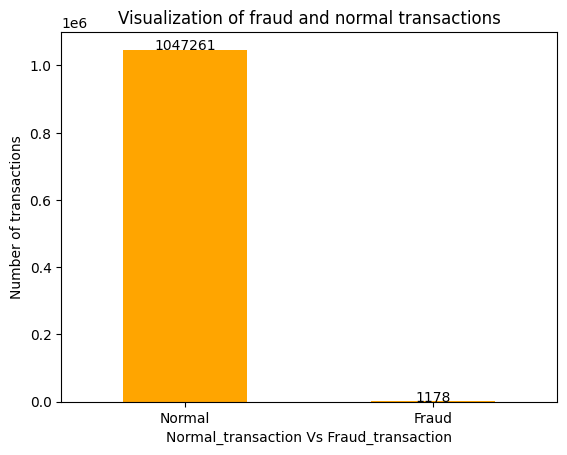

In [ ]:
import matplotlib.pyplot as plt

labels = ["Normal", "Fraud"]
count_classes = data['isFraud'].value_counts(sort=True)

# Plotting the bar chart
ax = count_classes.plot(kind="bar", rot=0, color="orange")

# Adding the count values on top of each bar
for i, count in enumerate(count_classes):
    ax.text(i, count + 50, str(count), ha='center')

plt.title("Visualization of fraud and normal transactions")
plt.ylabel("Number of transactions")
plt.xlabel("Normal_transaction Vs Fraud_transaction")
plt.xticks(range(2), labels)
plt.show()


In [ ]:
balanced_data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,2,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,4,181.00,181.00,0.00,0.0,0.00,1
3,1,1,181.00,181.00,0.00,21182.0,0.00,1
4,1,2,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,2,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,2,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,2,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,2,4024.36,2671.00,0.00,0.0,0.00,0
9,1,5,5337.77,41720.00,36382.23,41898.0,40348.79,0


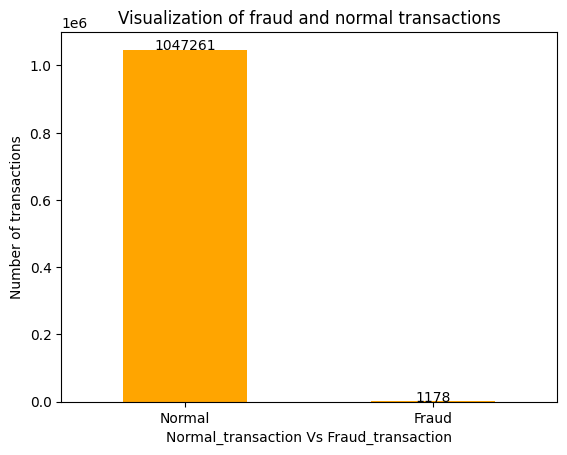

In [ ]:
import matplotlib.pyplot as plt

labels = ["Normal", "Fraud"]
count_classes = balanced_data['isFraud'].value_counts(sort=True)

# Plotting the bar chart
ax = count_classes.plot(kind="bar", rot=0, color="orange")

# Adding the count values on top of each bar
for i, count in enumerate(count_classes):
    ax.text(i, count + 50, str(count), ha='center')

plt.title("Visualization of fraud and normal transactions")
plt.ylabel("Number of transactions")
plt.xlabel("Normal_transaction Vs Fraud_transaction")
plt.xticks(range(2), labels)
plt.show()


In [ ]:
from sklearn.utils import resample

# Assuming you have a DataFrame named 'data' containing your dataset
# Separate fraud and non-fraud transactions
fraudulent = data[data['isFraud'] == 1]
non_fraudulent = data[data['isFraud'] == 0]

# Oversample fraudulent transactions to match the count of non-fraudulent transactions
oversampled_fraudulent = resample(fraudulent, replace=True, n_samples=1045678, random_state=42)

# Combine oversampled fraudulent transactions with non-fraudulent transactions
balanced_data = pd.concat([non_fraudulent, oversampled_fraudulent])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Now 'balanced_data' contains a balanced dataset with 1045678 fraudulent and non-fraudulent transactions each


In [ ]:
# Count occurrences of fraudulent and non-fraudulent transactions in the original dataset
original_counts = data['isFraud'].value_counts()

# Count occurrences of fraudulent and non-fraudulent transactions in the balanced dataset
balanced_counts = balanced_data['isFraud'].value_counts()

print("Original dataset:")
print("Non-Fraudulent:", original_counts[0])
print("Fraudulent:", original_counts[1])
print()

print("Balanced dataset:")
print("Non-Fraudulent:", balanced_counts[0])
print("Fraudulent:", balanced_counts[1])


Original dataset:
Non-Fraudulent: 1047261
Fraudulent: 1178

Balanced dataset:
Non-Fraudulent: 1047261
Fraudulent: 1045678


In [ ]:
balanced_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
839494,41,CASH_IN,39175.35,C1323490290,5782974.80,5822150.16,C1717677948,309368.27,270192.92,0,0
120410,11,CASH_IN,136316.36,C763502798,12147.00,148463.36,C1778300121,7529167.00,7392850.64,0,0
650133,35,TRANSFER,9465988.82,C851016578,9465988.82,0.00,C1650562969,0.00,0.00,1,0
387725,17,CASH_OUT,256468.28,C1160567522,619.00,0.00,C1886938557,621243.28,877711.55,0,0
926484,43,CASH_OUT,333491.92,C508189755,54904.00,0.00,C789700937,0.00,333491.92,0,0
55599,9,CASH_IN,152835.87,C496985,7997905.73,8150741.61,C483370168,189701.17,46331.87,0,0
139239,11,CASH_OUT,362455.22,C175980401,3412.00,0.00,C528560865,10657.00,373112.22,0,0
940199,43,TRANSFER,14006.65,C940628482,0.00,0.00,C1326813057,2261167.43,2275174.08,0,0
314542,16,PAYMENT,4758.10,C1517399462,297966.95,293208.85,M646797381,0.00,0.00,0,0
490492,19,CASH_IN,492869.83,C1014135027,53085.00,545954.83,C1604085736,0.00,0.00,0,0


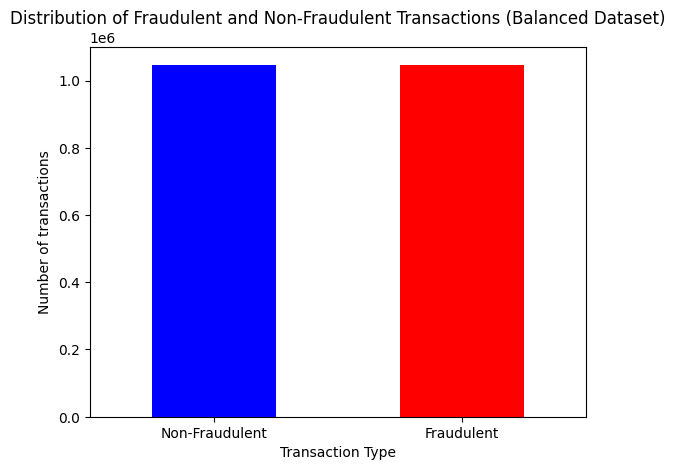

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of fraudulent and non-fraudulent transactions in the balanced dataset
balanced_counts = balanced_data['isFraud'].value_counts()

# Plotting the bar chart
labels = ["Non-Fraudulent", "Fraudulent"]
balanced_counts.plot(kind="bar", rot=0, color=["blue", "red"])
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions (Balanced Dataset)")
plt.ylabel("Number of transactions")
plt.xlabel("Transaction Type")
plt.xticks(range(2), labels)
plt.show()




In [ ]:
balanced_counts

0    1047261
1    1045678
Name: isFraud, dtype: int64

In [ ]:
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

## **All 10 Deep Learning Models**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your CSV data


data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)
# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] *200, ignore_index=True)  # Repeat 100 times based on the support value

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Simple Dense Neural Network
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Model 2: Deep Dense Neural Network
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model 3: Convolutional Neural Network (CNN)
model3 = keras.Sequential([
    layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Model 4: Recurrent Neural Network (RNN)
model4 = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Model 5: Bidirectional Recurrent Neural Network (Bi-RNN)
model5 = keras.Sequential([
    layers.Bidirectional(layers.LSTM(64), input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Model 6: Simple Deep Neural Network with Dropout
model6 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Model 7: Simple Deep Neural Network with Batch Normalization
model7 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Model 8: Simple Deep Neural Network with Regularization (L2)
model8 = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Model 9: Simple Deep Neural Network with Early Stopping
model9 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Model 10: Simple Deep Neural Network with Learning Rate Scheduler
model10 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
learning_rate_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

# Compile and train models
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
for idx, model in enumerate(models):
    print(f"Training Model {idx+1}...")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping, learning_rate_scheduler])

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
    print(f"Test Accuracy of Model {idx+1}: {test_acc}")

KeyboardInterrupt: 

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Assuming you have trained your model and stored predicted probabilities for the positive class
# Replace y_pred_prob with the predicted probabilities for the positive class from your model


# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 2: Deep Dense Neural Network
model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model2.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model2.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)


print(y_pred_prob)
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)

print("Deep Dense Neural Network")
print("Classification Report:")
print(classification_report_result)



Epoch 1/10
32072/32072 - 38s - loss: 0.0866 - accuracy: 0.9690 - 38s/epoch - 1ms/step
Epoch 2/10
32072/32072 - 36s - loss: 0.0610 - accuracy: 0.9770 - 36s/epoch - 1ms/step
Epoch 3/10
32072/32072 - 37s - loss: 0.0523 - accuracy: 0.9796 - 37s/epoch - 1ms/step
Epoch 4/10
32072/32072 - 36s - loss: 0.0460 - accuracy: 0.9820 - 36s/epoch - 1ms/step
Epoch 5/10
32072/32072 - 36s - loss: 0.0418 - accuracy: 0.9836 - 36s/epoch - 1ms/step
Epoch 6/10
32072/32072 - 37s - loss: 0.0389 - accuracy: 0.9848 - 37s/epoch - 1ms/step
Epoch 7/10
32072/32072 - 36s - loss: 0.0365 - accuracy: 0.9856 - 36s/epoch - 1ms/step
Epoch 8/10
32072/32072 - 37s - loss: 0.0340 - accuracy: 0.9867 - 37s/epoch - 1ms/step
Epoch 9/10
32072/32072 - 37s - loss: 0.0324 - accuracy: 0.9875 - 37s/epoch - 1ms/step
Epoch 10/10
32072/32072 - 37s - loss: 0.0311 - accuracy: 0.9878 - 37s/epoch - 1ms/step
8018/8018 [==============================] - 8s 1ms/step
Confusion Matrix:
[[207455   1888]
 [   893  46337]]
8018/8018 [==================

In [10]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: Simple Dense Neural Network
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model1.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model1.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

print("Y_pre_prob")
print(y_pred_prob)
print("end")
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)

print("Simple neurl network")
print("Classification Report:")
print(classification_report_result)



Epoch 1/10
32072/32072 [==============================] - 52s 2ms/step - loss: 0.1253 - accuracy: 0.9566 - val_loss: 0.1039 - val_accuracy: 0.9663
Epoch 2/10
32072/32072 [==============================] - 51s 2ms/step - loss: 0.0900 - accuracy: 0.9688 - val_loss: 0.0845 - val_accuracy: 0.9698
Epoch 3/10
32072/32072 [==============================] - 49s 2ms/step - loss: 0.0817 - accuracy: 0.9716 - val_loss: 0.0775 - val_accuracy: 0.9732
Epoch 4/10
32072/32072 [==============================] - 47s 1ms/step - loss: 0.0774 - accuracy: 0.9730 - val_loss: 0.0733 - val_accuracy: 0.9739
Epoch 5/10
32072/32072 [==============================] - 48s 1ms/step - loss: 0.0741 - accuracy: 0.9741 - val_loss: 0.0725 - val_accuracy: 0.9736
Epoch 6/10
32072/32072 [==============================] - 50s 2ms/step - loss: 0.0712 - accuracy: 0.9752 - val_loss: 0.0668 - val_accuracy: 0.9758
Epoch 7/10
32072/32072 [==============================] - 48s 1ms/step - loss: 0.0681 - accuracy: 0.9764 - val_loss: 0

Epoch 1/10
32072/32072 [==============================] - 52s 2ms/step - loss: 0.1314 - accuracy: 0.9551 - val_loss: 0.1030 - val_accuracy: 0.9673
Epoch 2/10
32072/32072 [==============================] - 53s 2ms/step - loss: 0.0989 - accuracy: 0.9685 - val_loss: 0.0939 - val_accuracy: 0.9709
Epoch 3/10
32072/32072 [==============================] - 51s 2ms/step - loss: 0.0919 - accuracy: 0.9708 - val_loss: 0.0901 - val_accuracy: 0.9703
Epoch 4/10
32072/32072 [==============================] - 51s 2ms/step - loss: 0.0878 - accuracy: 0.9722 - val_loss: 0.0854 - val_accuracy: 0.9748
Epoch 5/10
32072/32072 [==============================] - 54s 2ms/step - loss: 0.0845 - accuracy: 0.9732 - val_loss: 0.0825 - val_accuracy: 0.9749
Epoch 6/10
32072/32072 [==============================] - 54s 2ms/step - loss: 0.0814 - accuracy: 0.9739 - val_loss: 0.0802 - val_accuracy: 0.9734
Epoch 7/10
32072/32072 [==============================] - 51s 2ms/step - loss: 0.0791 - accuracy: 0.9746 - val_loss: 0

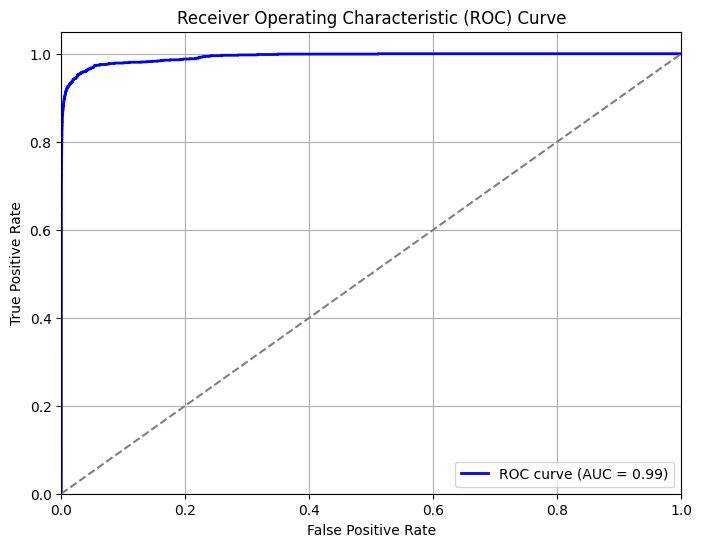

Simple neurl network
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    209343
           1       0.93      0.93      0.93     47230

    accuracy                           0.98    256573
   macro avg       0.96      0.96      0.96    256573
weighted avg       0.98      0.98      0.98    256573



In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model3 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model1.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model3.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

print("Y_pre_prob")
print(y_pred_prob)
print("end")
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)

print("Simple neurl network")
print("Classification Report:")
print(classification_report_result)

Epoch 1/10
32072/32072 [==============================] - 145s 4ms/step - loss: 0.1247 - accuracy: 0.9559 - val_loss: 0.0774 - val_accuracy: 0.9737
Epoch 2/10
32072/32072 [==============================] - 145s 5ms/step - loss: 0.0628 - accuracy: 0.9766 - val_loss: 0.0459 - val_accuracy: 0.9815
Epoch 3/10
32072/32072 [==============================] - 137s 4ms/step - loss: 0.0446 - accuracy: 0.9822 - val_loss: 0.0419 - val_accuracy: 0.9820
Epoch 4/10
32072/32072 [==============================] - 148s 5ms/step - loss: 0.0350 - accuracy: 0.9858 - val_loss: 0.0313 - val_accuracy: 0.9867
Epoch 5/10
32072/32072 [==============================] - 139s 4ms/step - loss: 0.0293 - accuracy: 0.9882 - val_loss: 0.0242 - val_accuracy: 0.9908
Epoch 6/10
32072/32072 [==============================] - 147s 5ms/step - loss: 0.0255 - accuracy: 0.9898 - val_loss: 0.0215 - val_accuracy: 0.9921
Epoch 7/10
32072/32072 [==============================] - 140s 4ms/step - loss: 0.0225 - accuracy: 0.9911 - val_

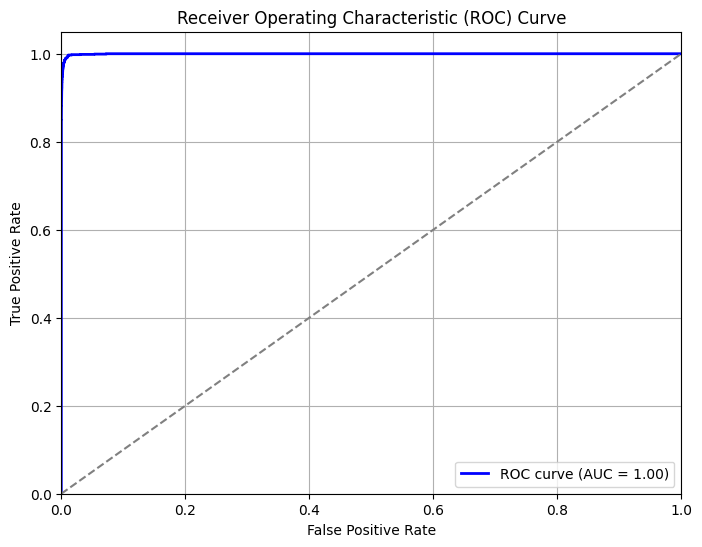

Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    209343
           1       0.98      0.98      0.98     47230

    accuracy                           0.99    256573
   macro avg       0.99      0.99      0.99    256573
weighted avg       0.99      0.99      0.99    256573



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score  # Add this import statement

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 4: Recurrent Neural Network (RNN)
model4 = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model4.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model4.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)

print("Y_pre_prob")
print(y_pred_prob)
print("end")
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC ROC Score:", auc_roc)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred_prob contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Simple neural network")
print("Classification Report:")
print(classification_report_result)



Epoch 1/5
32072/32072 [==============================] - 64s 2ms/step - loss: 0.1682 - accuracy: 0.9413 - val_loss: 0.1128 - val_accuracy: 0.9587
Epoch 2/5
32072/32072 [==============================] - 52s 2ms/step - loss: 0.1269 - accuracy: 0.9561 - val_loss: 0.0970 - val_accuracy: 0.9669
Epoch 3/5
32072/32072 [==============================] - 50s 2ms/step - loss: 0.1153 - accuracy: 0.9602 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 4/5
32072/32072 [==============================] - 49s 2ms/step - loss: 0.1080 - accuracy: 0.9626 - val_loss: 0.0817 - val_accuracy: 0.9732
Epoch 5/5
8018/8018 [==============================] - 7s 911us/step
Confusion Matrix:
[[208180   1163]
 [  6429  40801]]
8018/8018 [==============================] - 8s 953us/step


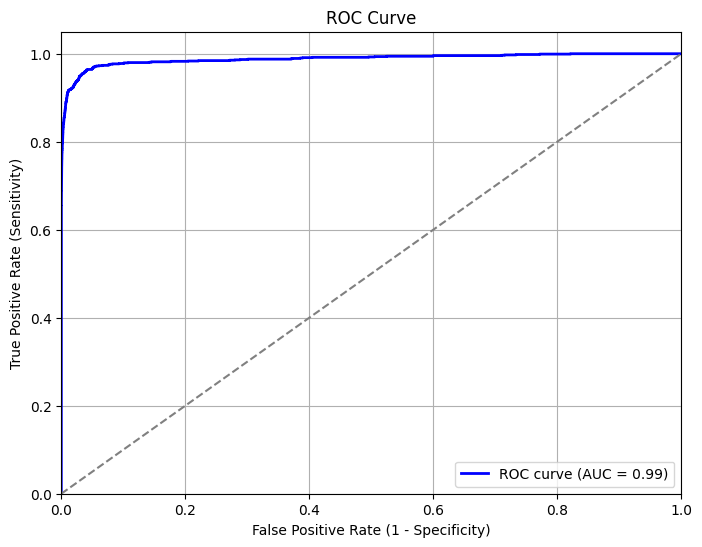

Y_pre_prob
[0.49788764 0.00900208 0.00892617 ... 0.01653026 0.09074166 0.00576639]
end
Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    209343
           1       0.97      0.86      0.91     47230

    accuracy                           0.97    256573
   macro avg       0.97      0.93      0.95    256573
weighted avg       0.97      0.97      0.97    256573



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 6: Simple Deep Neural Network with Dropout
model6= keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model6.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model6.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model6.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)


Epoch 1/10
32072/32072 [==============================] - 198s 6ms/step - loss: 0.0866 - accuracy: 0.9693 - val_loss: 0.0470 - val_accuracy: 0.9831
Epoch 2/10
32072/32072 [==============================] - 198s 6ms/step - loss: 0.0459 - accuracy: 0.9829 - val_loss: 0.0429 - val_accuracy: 0.9827
Epoch 3/10
32072/32072 [==============================] - 200s 6ms/step - loss: 0.0357 - accuracy: 0.9861 - val_loss: 0.0285 - val_accuracy: 0.9897
Epoch 4/10
32072/32072 [==============================] - 194s 6ms/step - loss: 0.0291 - accuracy: 0.9885 - val_loss: 0.0210 - val_accuracy: 0.9912
Epoch 5/10
32072/32072 [==============================] - 190s 6ms/step - loss: 0.0249 - accuracy: 0.9901 - val_loss: 0.0250 - val_accuracy: 0.9900
Epoch 6/10
32072/32072 [==============================] - 190s 6ms/step - loss: 0.0219 - accuracy: 0.9913 - val_loss: 0.0355 - val_accuracy: 0.9867
Epoch 7/10
32072/32072 [==============================] - 197s 6ms/step - loss: 0.0197 - accuracy: 0.9921 - val_

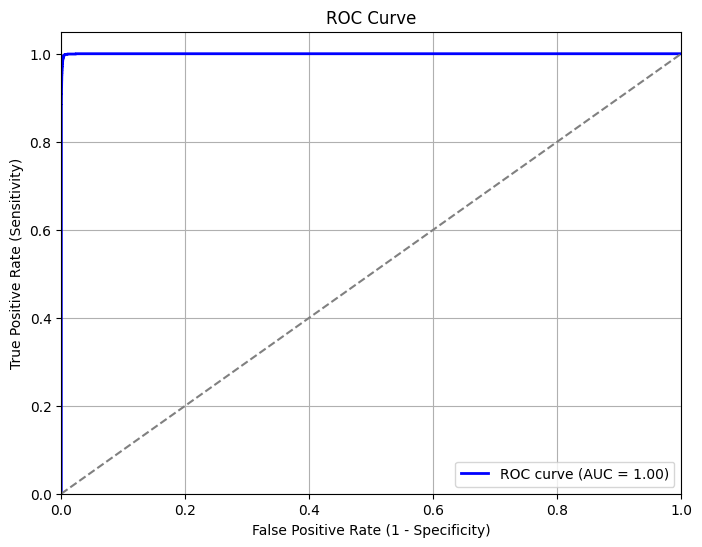

Y_pre_prob
[[9.9932957e-01]
 [4.7622755e-01]
 [9.8300452e-09]
 ...
 [7.7965313e-07]
 [9.9745333e-01]
 [1.7352829e-11]]
end
Simple neurl network
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    209343
           1       0.97      1.00      0.99     47230

    accuracy                           0.99    256573
   macro avg       0.99      1.00      0.99    256573
weighted avg       0.99      0.99      0.99    256573



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model 5: Bidirectional Recurrent Neural Network (Bi-RNN)
model5 = keras.Sequential([
    layers.Bidirectional(layers.LSTM(64), input_shape=(X_train_scaled.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model5.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred = model5.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions
y_pred_prob = model5.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model5.predict(X_test_scaled)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neurl network")
print("Classification Report:")
print(classification_report_result)

Epoch 1/5
32072/32072 [==============================] - 60s 2ms/step - loss: 0.0942 - accuracy: 0.9673 - val_loss: 0.0795 - val_accuracy: 0.9720
Epoch 2/5
32072/32072 [==============================] - 55s 2ms/step - loss: 0.0756 - accuracy: 0.9739 - val_loss: 0.0636 - val_accuracy: 0.9779
Epoch 3/5
32072/32072 [==============================] - 54s 2ms/step - loss: 0.0715 - accuracy: 0.9750 - val_loss: 0.0924 - val_accuracy: 0.9634
Epoch 4/5
32072/32072 [==============================] - 52s 2ms/step - loss: 0.0683 - accuracy: 0.9759 - val_loss: 0.0642 - val_accuracy: 0.9793
Epoch 5/5
8018/8018 [==============================] - 8s 936us/step
Confusion Matrix:
[[205375   3968]
 [  2102  45128]]
8018/8018 [==============================] - 8s 1ms/step


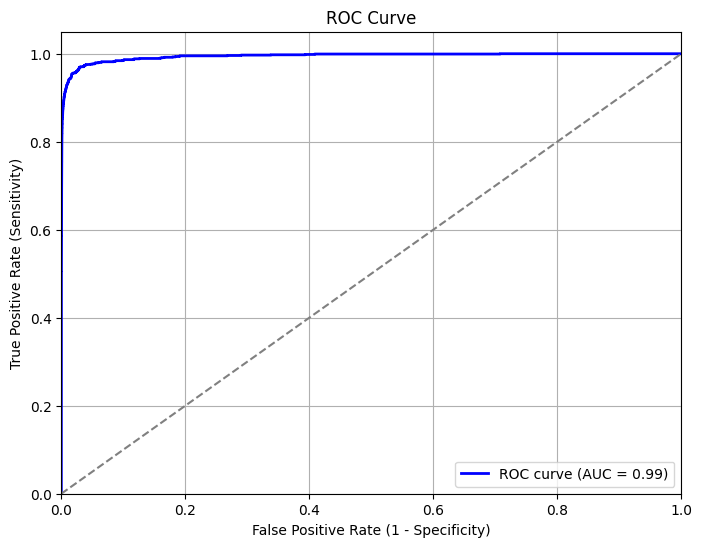

Y_pre_prob
[0.9976821  0.00556213 0.01111726 ... 0.00644927 0.6308622  0.00317688]
end
Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    209343
           1       0.92      0.96      0.94     47230

    accuracy                           0.98    256573
   macro avg       0.95      0.97      0.96    256573
weighted avg       0.98      0.98      0.98    256573



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 7: Simple Deep Neural Network with Batch Normalization
model7 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model7.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model7.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model7.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)


Epoch 1/5
32072/32072 [==============================] - 60s 2ms/step - loss: 0.1993 - accuracy: 0.9405 - val_loss: 0.1678 - val_accuracy: 0.9536
Epoch 2/5
32072/32072 [==============================] - 48s 1ms/step - loss: 0.1619 - accuracy: 0.9513 - val_loss: 0.1583 - val_accuracy: 0.9606
Epoch 3/5
32072/32072 [==============================] - 52s 2ms/step - loss: 0.1514 - accuracy: 0.9540 - val_loss: 0.1448 - val_accuracy: 0.9616
Epoch 4/5
32072/32072 [==============================] - 51s 2ms/step - loss: 0.1450 - accuracy: 0.9561 - val_loss: 0.1393 - val_accuracy: 0.9601
Epoch 5/5
8018/8018 [==============================] - 8s 981us/step
Confusion Matrix:
[[204626   4717]
 [  6703  40527]]
8018/8018 [==============================] - 7s 910us/step


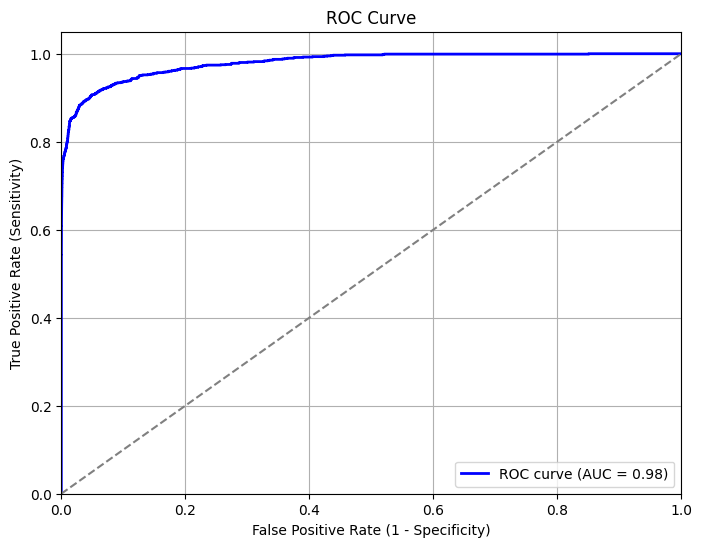

Y_pre_prob
[0.49401015 0.17686786 0.02438334 ... 0.00259954 0.19864506 0.01987658]
end
Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    209343
           1       0.90      0.86      0.88     47230

    accuracy                           0.96    256573
   macro avg       0.93      0.92      0.92    256573
weighted avg       0.95      0.96      0.96    256573



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 8: Simple Deep Neural Network with Batch Normalizatio
# Model 8: Simple Deep Neural Network with Regularization (L2)
model8 = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model8.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model8.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model8.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)



Epoch 1/5
32072/32072 [==============================] - 49s 1ms/step - loss: 0.1208 - accuracy: 0.9580 - val_loss: 0.0916 - val_accuracy: 0.9688
Epoch 2/5
32072/32072 [==============================] - 50s 2ms/step - loss: 0.0866 - accuracy: 0.9708 - val_loss: 0.0827 - val_accuracy: 0.9726
Epoch 3/5
32072/32072 [==============================] - 49s 2ms/step - loss: 0.0801 - accuracy: 0.9727 - val_loss: 0.0784 - val_accuracy: 0.9730
Epoch 4/5
32072/32072 [==============================] - 48s 1ms/step - loss: 0.0765 - accuracy: 0.9738 - val_loss: 0.0736 - val_accuracy: 0.9748
Epoch 5/5
8018/8018 [==============================] - 8s 939us/step
Confusion Matrix:
[[208262   1081]
 [  5230  42000]]
8018/8018 [==============================] - 7s 916us/step


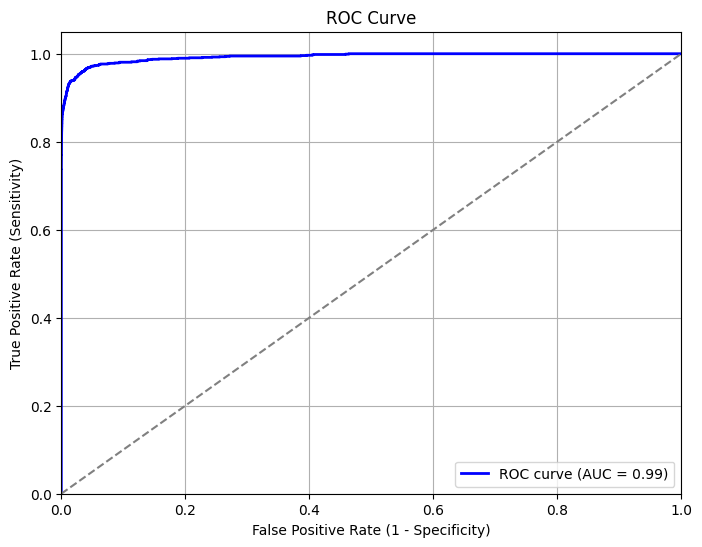

Y_pre_prob
[9.4816864e-01 2.8475329e-02 1.1166568e-02 ... 5.1878305e-05 1.4832631e-01
 5.9241406e-04]
end
Simple neural network
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    209343
           1       0.97      0.89      0.93     47230

    accuracy                           0.98    256573
   macro avg       0.98      0.94      0.96    256573
weighted avg       0.98      0.98      0.97    256573



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 9: Simple Deep Neural Network with Early Stopping
model9 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Compile the model
model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model9.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model9.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model9.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 10: Simple Deep Neural Network with Batch Normalization
model10 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model10.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
y_pred_prob = model10.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_binary)


# Calculate the probabilities of the positive class (fraud) from the model's predictions
y_pred_prob = model10.predict(X_test_scaled).flatten()

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Y_pre_prob")
print(y_pred_prob)
print("end")
print("Simple neural network")
print("Classification Report:")
print(classification_report_result)


# PERTFORMANCE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_models = 10
trained_models = ['model1','model2','model3','model4','model5','model6','model7','model8','model9','model10']

for i in range(num_models):
    # Define model architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(7,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(x_train, y_train, epochs=10, verbose=0)

    # Evaluate model
    y_pred = model.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred.round())
    precision = precision_score(y_test, y_pred.round())
    recall = recall_score(y_test, y_pred.round())
    f1 = f1_score(y_test, y_pred.round())
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print performance metrics
    print(f"Model {i+1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

    # Store trained model for further analysis if needed
    trained_models.append(model)


Model 1 - Training Accuracy: 0.5730, Training AUC: 0.6178, Validation Accuracy: 0.5100, Validation AUC: 0.5163
7/7 [==============================] - 0s 4ms/step
Model 1 - Validation ROC AUC: 0.5151
Model 2 - Training Accuracy: 0.5680, Training AUC: 0.6159, Validation Accuracy: 0.4950, Validation AUC: 0.5151
7/7 [==============================] - 0s 3ms/step
Model 2 - Validation ROC AUC: 0.5141
Model 3 - Training Accuracy: 0.5780, Training AUC: 0.6284, Validation Accuracy: 0.4600, Validation AUC: 0.5085
7/7 [==============================] - 0s 2ms/step
Model 3 - Validation ROC AUC: 0.5076
Model 4 - Training Accuracy: 0.5720, Training AUC: 0.6312, Validation Accuracy: 0.5100, Validation AUC: 0.5211
7/7 [==============================] - 0s 3ms/step
Model 4 - Validation ROC AUC: 0.5209
Model 5 - Training Accuracy: 0.5620, Training AUC: 0.6102, Validation Accuracy: 0.5200, Validation AUC: 0.5140
7/7 [==============================] - 0s 3ms/step
Model 5 - Validation ROC AUC: 0.5148
Model

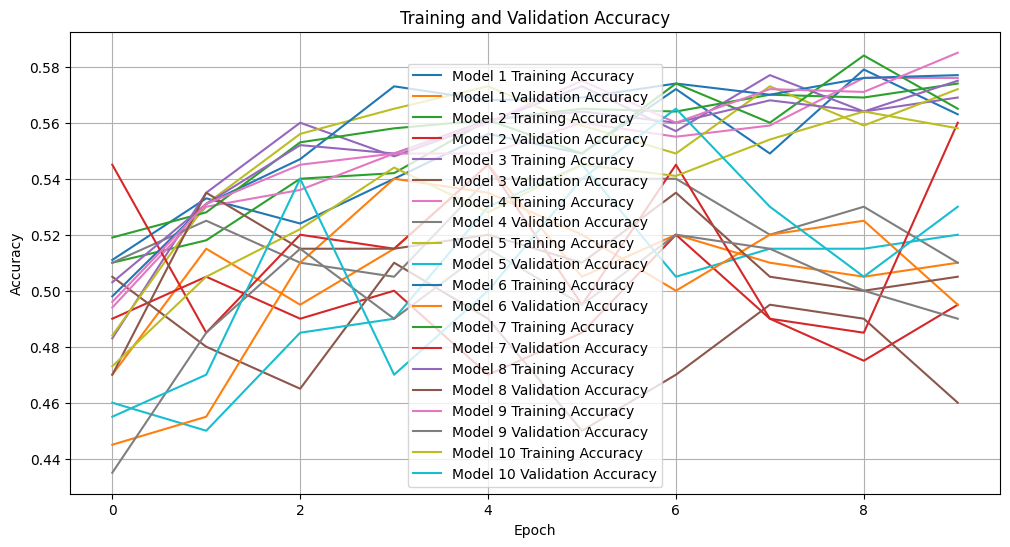

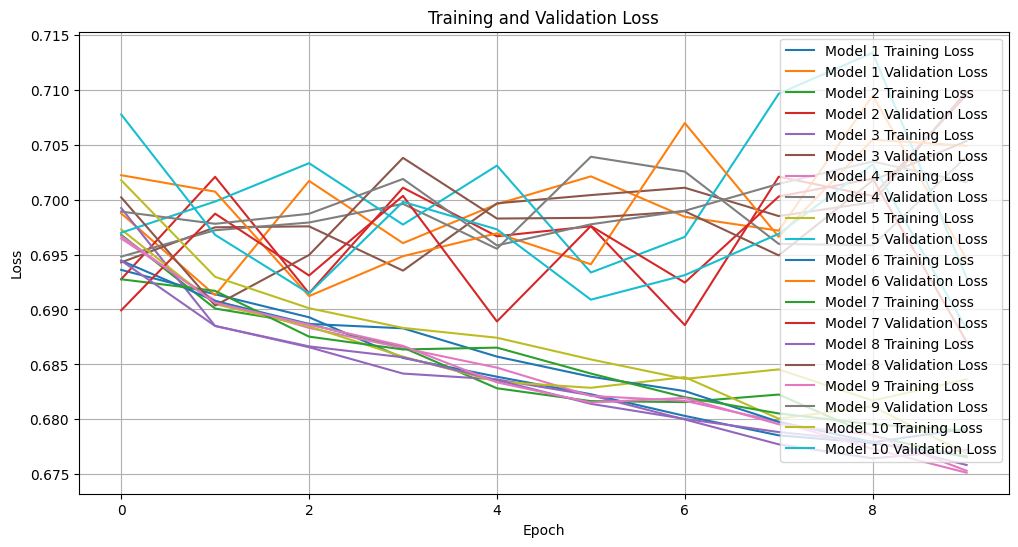

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Example data (replace with your actual data)
# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Example: Define and train 10 models
num_models = 10
training_histories = []

for i in range(num_models):
    # Define model architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', AUC()])

    # Train model
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, verbose=0)
    training_histories.append(history.history)

    # Evaluate model
    _, train_acc, train_auc = model.evaluate(x_train, y_train, verbose=0)
    _, val_acc, val_auc = model.evaluate(x_val, y_val, verbose=0)

    print(f"Model {i+1} - Training Accuracy: {train_acc:.4f}, Training AUC: {train_auc:.4f}, "
          f"Validation Accuracy: {val_acc:.4f}, Validation AUC: {val_auc:.4f}")

    # Calculate ROC AUC score
    y_val_pred = model.predict(x_val)
    roc_auc = roc_auc_score(y_val, y_val_pred)
    print(f"Model {i+1} - Validation ROC AUC: {roc_auc:.4f}")

    # Store model
    models.append(model)

# Plot training history for each model
plt.figure(figsize=(12, 6))
for i, history in enumerate(training_histories):
    plt.plot(history['accuracy'], label=f'Model {i+1} Training Accuracy')
    plt.plot(history['val_accuracy'], label=f'Model {i+1} Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for i, history in enumerate(training_histories):
    plt.plot(history['loss'], label=f'Model {i+1} Training Loss')
    plt.plot(history['val_loss'], label=f'Model {i+1} Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
# Load CSV data
data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD/Mydataset_.csv")

# Replace categorical values with numerical equivalents
data_replace = data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
                            value=[2, 4, 1, 5, 3], inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Repeat each row in the minority class (class 1) based on the support value
minority_class_data = data[data['isFraud'] == 1].copy()
repeated_minority_class_data = pd.concat([minority_class_data] * 200, ignore_index=True)  # Repeat 200 times

# Concatenate the original majority class (class 0) DataFrame with the repeated minority class DataFrame
repeated_data = pd.concat([data[data['isFraud'] == 0], repeated_minority_class_data], ignore_index=True)

# Separate features (X) and target variable (y)
X = repeated_data.drop('isFraud', axis=1)
y = repeated_data['isFraud']

# Example: Define and train 10 models
num_models = 10
training_histories = []

for i in range(num_models):
    # Define model architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', AUC()])

    # Train model
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, verbose=0)
    training_histories.append(history.history)

    # Print and store training loss
    training_loss_values = history.history['loss']
    print(f"Model {i+1} - Training Loss: {training_loss_values}")
    # You can store these values for further analysis if needed

# Now you can access the training loss values for each model from the training_histories list


Model 1 - Training Loss: [0.6946136355400085, 0.6895261406898499, 0.6879303455352783, 0.687483549118042, 0.6832879185676575, 0.6836300492286682, 0.6807621717453003, 0.6810303926467896, 0.6776103973388672, 0.6768381595611572]
Model 2 - Training Loss: [0.6977140307426453, 0.6924300193786621, 0.68962162733078, 0.6880068182945251, 0.6853649616241455, 0.6849151253700256, 0.6818185448646545, 0.6791921854019165, 0.6775845885276794, 0.6775724291801453]
Model 3 - Training Loss: [0.6923900246620178, 0.6891434788703918, 0.6871508955955505, 0.6859892010688782, 0.6839475631713867, 0.6823843717575073, 0.6814067363739014, 0.6798011660575867, 0.6786099076271057, 0.6784759163856506]
Model 4 - Training Loss: [0.6950930953025818, 0.689611554145813, 0.6873900890350342, 0.686399519443512, 0.6853570938110352, 0.6860986351966858, 0.6819647550582886, 0.6818103790283203, 0.6798830628395081, 0.6807623505592346]
Model 5 - Training Loss: [0.6978856921195984, 0.6902766823768616, 0.6879852414131165, 0.6865020394325

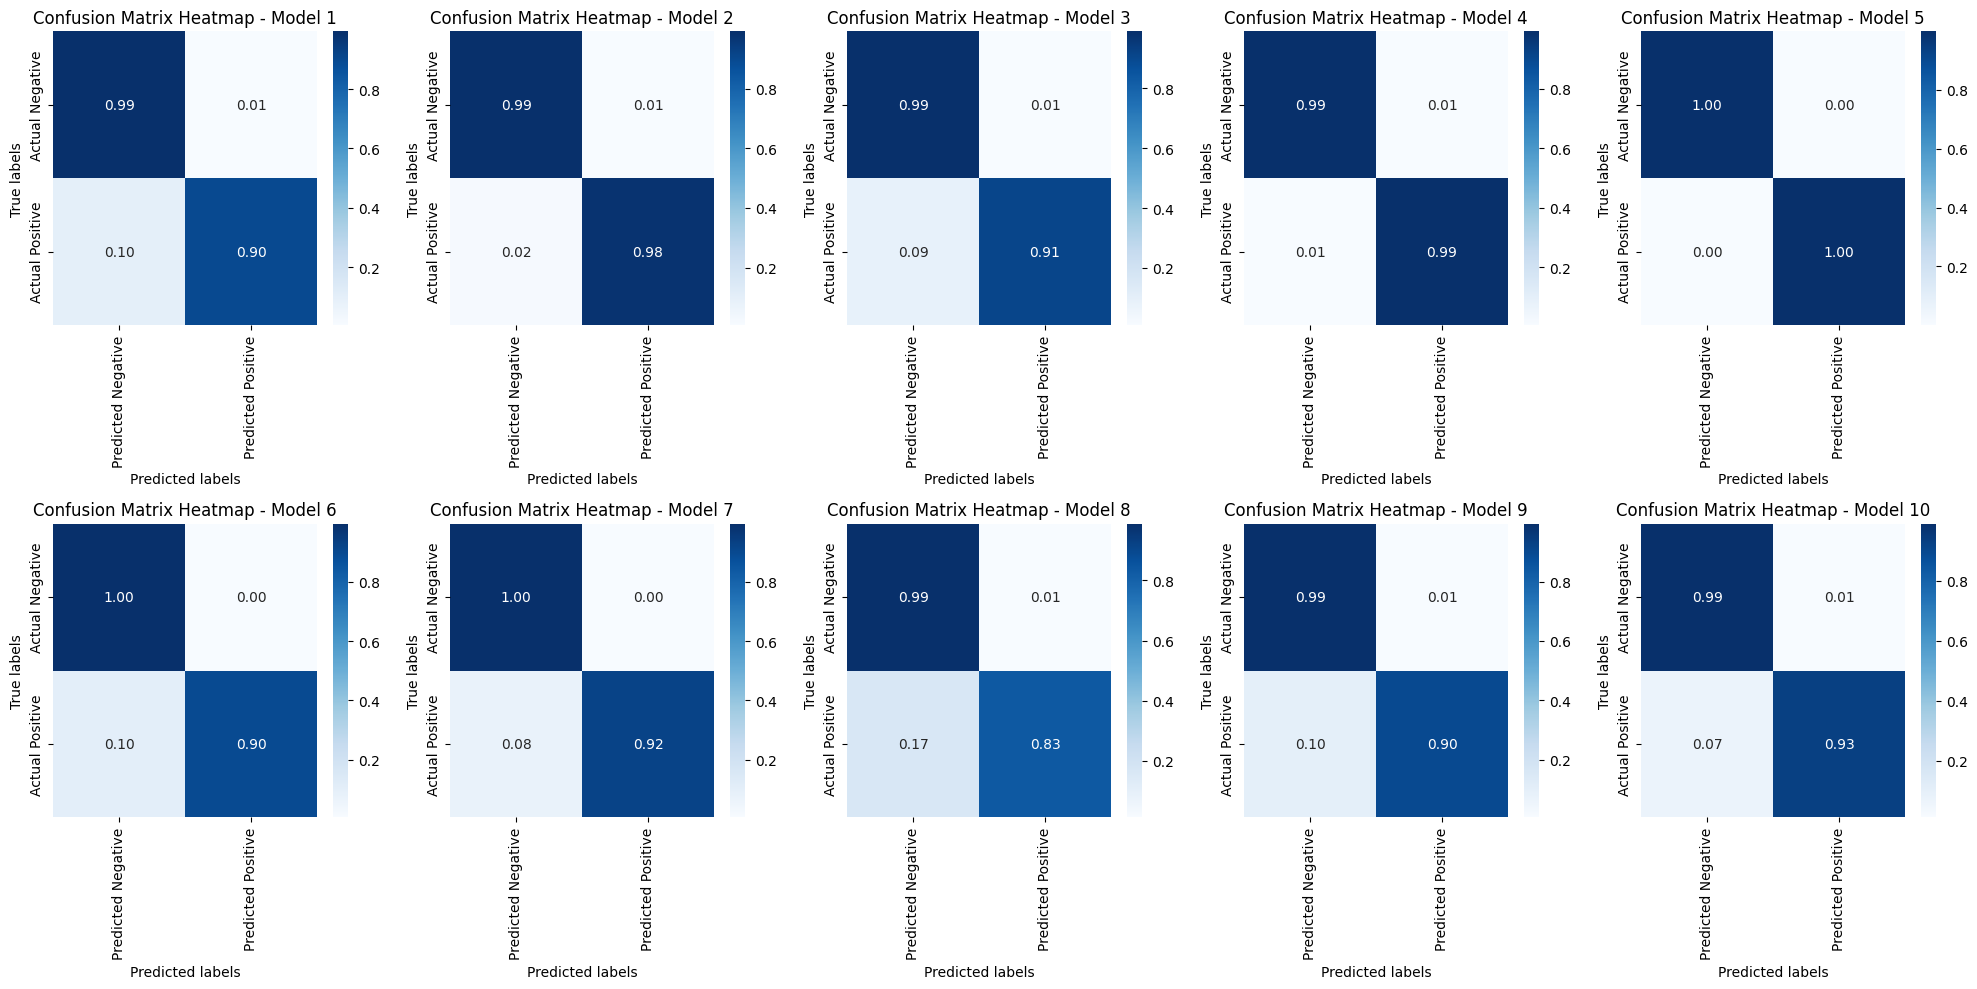

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each model
confusion_matrices = [
    np.array([[208124  ,1219], [ 4772 ,42458]]),  # Model 1
    np.array([[207678  ,1665] ,[ 988 ,46242]]), # Model 2
    np.array([[207413   ,1930] , [  4136  ,43094]]), # Model 3
    np.array([[208041  ,1302] ,[   313 , 46917]]), # Model 4
    np.array([[208439   , 904],[ 48,  47182]]), # Model 5
    np.array([[208431    , 912], [  4920 ,  42310]]), # Model 6
    np.array([[208435  , 908] ,[  3626  ,43604]]), # Model 7
    np.array([[206776   ,2567], [  7839 , 39391]]), # Model 8
    np.array([[208180 ,  1163], [  4710  ,42520]]), # Model 9
    np.array([[207202   ,2141], [  3365 , 43865]])  # Model 10 (same as Model 1)
]

# Define the names of the models
model_names = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5",
               "Model 6", "Model 7", "Model 8", "Model 9", "Model 10"]

# Plot heatmaps for each confusion matrix
plt.figure(figsize=(20, 10))
for i, cm in enumerate(confusion_matrices, 1):
    plt.subplot(2, 5, i)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f'Confusion Matrix Heatmap - {model_names[i-1]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.tight_layout()
plt.show()


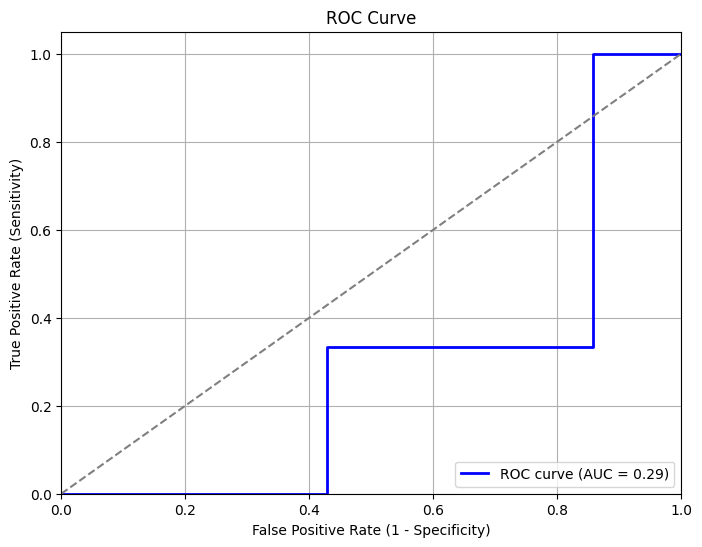

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define y_val_array and y_pred_probs_array
y_val_array = np.array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])
y_pred_probs_array = np.array([0.47, 0.58, 0.52, 0.50, 0.49, 0.496, 0.497, 0.45, 0.46, 0.51])

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_val_array, y_pred_probs_array)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_val_array, y_pred_probs_array)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

